In [ ]:
import fiftyone as fo
import fiftyone.utils.huggingface as fouh

# Load the dataset from Hugging Face if it's your first time using it

# dataset = fouh.load_from_hub(
# "Voxel51/Data-Centric-Visual-AI-Challenge-Train-Set", 
# dataset_name="lecture_dataset_train", 
# persistent=True)

# Brief introduction to the FiftyOne App

In [ ]:
#because I have the dataset saved locally, I will load it like so
dataset = fo.load_dataset("lecture_dataset_train")
dataset.compute_metadata()

In [ ]:
# dataset = dataset.clone(name="lectrure-train-clone") #clone the dataset to avoid modifying the original dataset
dataset = fo.load_dataset(name="lectrure-train-clone")

In [ ]:
# Launch the App
session = fo.launch_app(dataset)

## Profiling Your FiftyOne Dataset: A Quick Overview

This profiling strategy should provide you with valuable insights into about your FiftyOne dataset, helping you understand its characteristics and potential challenges or opportunities for further analysis or model training.

There are several important aspects of dataset profiling, particularly for a dataset that seems to contain image samples with object detections. Here's what you'll cover:

1. Basic dataset information: Getting an overview of the dataset size and structure.

2. Sample examination: Looking at individual samples to understand their fields and content.

3. Detection statistics: Analyzing the number and distribution of detections across the dataset.

4. Label distribution: Examining the frequency and variety of labels in our dataset.

5. Image resolution analysis: Understanding the typical sizes of images in our dataset.

6. Advanced profiling: Using FiftyOne's built-in tools for comprehensive dataset analysis.

By the end of this section, you'll have a solid grasp on your dataset's composition, which will inform your subsequent analysis and model development steps.

#### Metadata about the dataset


In [ ]:
dataset

#### Get the first sample of a dataset, what fields do you see?


In [ ]:
first_sample = dataset.first()

In [ ]:
first_sample

In [ ]:
first_sample.field_names

#### Metadata about the sample


In [ ]:
first_sample.filepath

In [ ]:
first_sample.metadata

#### Count of detections on sample level

In [ ]:
len(first_sample.ground_truth.detections)

#### Count of unique labels on sample level


In [ ]:
label_counts = {}

for detection in first_sample.ground_truth.detections:
    label = detection.label
    if label in label_counts:
        label_counts[label] += 1
    else:
        label_counts[label] = 1

In [ ]:
label_counts

Or, you can create a `DatasetView` by selecting the ID of first sample. 

Dataset views are ordered collections of sample subsets from a dataset.
 
You can chain operations on dataset views to get the subset you want. Then, you can iterate over this subset to access the sample views directly. Each step in creating a dataset view is represented by a `fiftyone.core.stages.ViewStage` instance.

The stages of a dataset view define:
 
 - Which samples (and their order) to include
 - Which fields of each sample to include, possibly filtered

You'll learn A LOT about [`DatasetView`](https://docs.voxel51.com/api/fiftyone.core.view.html?highlight=view#module-fiftyone.core.view) and [`ViewExpressions`](https://docs.voxel51.com/api/fiftyone.core.expressions.html?highlight=viewexpression#fiftyone.core.expressions.ViewExpression) throughout the lessons.

In [ ]:
# Create a view with just this sample
sample_view = dataset.select(first_sample.id)

In [ ]:
# Count detections in this sample
sample_detection_counts = sample_view.count("ground_truth.detections")
print(f"Detection counts for sample {first_sample.id}:")
print(sample_detection_counts)

In [ ]:
# Count labels in this sample
sample_label_counts = sample_view.count_values("ground_truth.detections.label")

print(f"Label counts for sample {first_sample.id}:")
print(sample_label_counts)

Note, if you try any of the above on just a `Sample` object you'll encounter errors. Whatever you can do on a `Dataset` you can do on a `View`. 



#### How many samples are in the dataset


In [ ]:
len(dataset)

In [ ]:
dataset.count()

In [ ]:
%%timeit
len(dataset)

In [ ]:
%%timeit
dataset.count()

#### How many labels in the whole dataset


In [ ]:
distinct_labels = dataset.distinct("ground_truth.detections.label") #this will return a list of distinct labels

print(f"Number of distinct labels: {len(distinct_labels)}")
print("\n")
print(f"The distinct labels are: {distinct_labels}")

#### How many detections in the whole dataset


In [166]:
count_of_detections = dataset.aggregate(fo.Count("ground_truth.detections"))

print(f"Total number of detections: {count_of_detections}") 

Total number of detections: 86676


In [109]:
# First, get the unsorted counts
unsorted_counts = dataset.count_values("ground_truth.detections.label")

# Then, sort the dictionary by keys (labels)
sorted_counts = dict(sorted(unsorted_counts.items(), key=lambda item: item[1], reverse=True))

print("Sorted label counts:")
sorted_counts

Sorted label counts:


{'doughnut': 9959,
 'tomato': 9692,
 'onion': 7977,
 'baseball_cap': 7162,
 'trousers': 6475,
 'jacket': 6289,
 'hat': 5916,
 'sunglasses': 4497,
 'short_pants': 4440,
 'jean': 4403,
 'pastry': 4030,
 'helmet': 3785,
 'coat': 3288,
 'flowerpot': 3009,
 'goggles': 2523,
 'trash_can': 2123,
 'bucket': 1108}

You can also explore the dataset with a variety of interactive plots. [Learn more in the docs](https://docs.voxel51.com/user_guide/plots.html).

Here's a [categorical histogram](https://docs.voxel51.com/api/fiftyone.core.plots.views.html#fiftyone.core.plots.views.CategoricalHistogram) of count of detections by label.

In [111]:
from fiftyone.core.plots.views import CategoricalHistogram

CategoricalHistogram(
    init_view=dataset,
    field_or_expr="ground_truth.detections.label",
    xlabel="Label",
    title="Count of detections per label",
    order="frequency"
)

FigureWidget({
    'data': [{'hovertemplate': '<b>label: %{x}</b><br>count: %{y}<extra></extra>',
              'marker': {'color': '#FF6D04'},
              'type': 'bar',
              'uid': '0348a7ad-958a-4e23-8b82-577e0324d98b',
              'x': [doughnut, tomato, onion, baseball_cap, trousers, jacket, hat,
                    sunglasses, short_pants, jean, pastry, helmet, coat, flowerpot,
                    goggles, trash_can, bucket],
              'y': [9959, 9692, 7977, 7162, 6475, 6289, 5916, 4497, 4440, 4403,
                    4030, 3785, 3288, 3009, 2523, 2123, 1108]}],
    'layout': {'margin': {'b': 0, 'l': 0, 'r': 0, 't': 30},
               'template': '...',
               'title': {'text': 'Count of detections per label'},
               'xaxis': {'title': {'text': 'Label'}},
               'yaxis': {'title': {'text': 'count'}}}
})

You can also get the distribution of detection counts per image.

In [120]:
from fiftyone import ViewField as F

CategoricalHistogram(
    init_view=dataset,
    field_or_expr="ground_truth",
    expr=F("detections").length(),
    title="Count of Images by Number of Detections",
    xlabel="Number of Detections per image",
    template={
        "layout": {
            "xaxis": {
                "range": [0, 30]  # This sets the x-axis range from 0 to 30
            }
        }
    }
)

FigureWidget({
    'data': [{'hovertemplate': '<b>ground_truth: %{x}</b><br>count: %{y}<extra></extra>',
              'marker': {'color': '#FF6D04'},
              'type': 'bar',
              'uid': '0a2a2114-76bb-4470-8bf7-482d813318d9',
              'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
                    19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
                    35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
                    51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
                    67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
                    84, 85, 86, 87, 89, 90, 92, 93, 94, 95, 97, 98, 99, 100, 101,
                    102, 103, 107, 108, 109, 110, 113, 118, 120, 121, 122, 126,
                    127, 131, 132, 135, 137, 147, 151, 155, 156, 172, 177, 178,
                    186, 188, 190, 196, 209, 240, 243, 309, 478, 578],
              'y': [6505, 3

Maybe now you're curious what those images are that have so many detections in them. You can make use of a [`ViewStage`](https://docs.voxel51.com/api/fiftyone.core.stages.html#fiftyone.core.stages.Match) to create a [`View`](https://docs.voxel51.com/api/fiftyone.core.view.html#fiftyone.core.view.DatasetView) and inspect that.


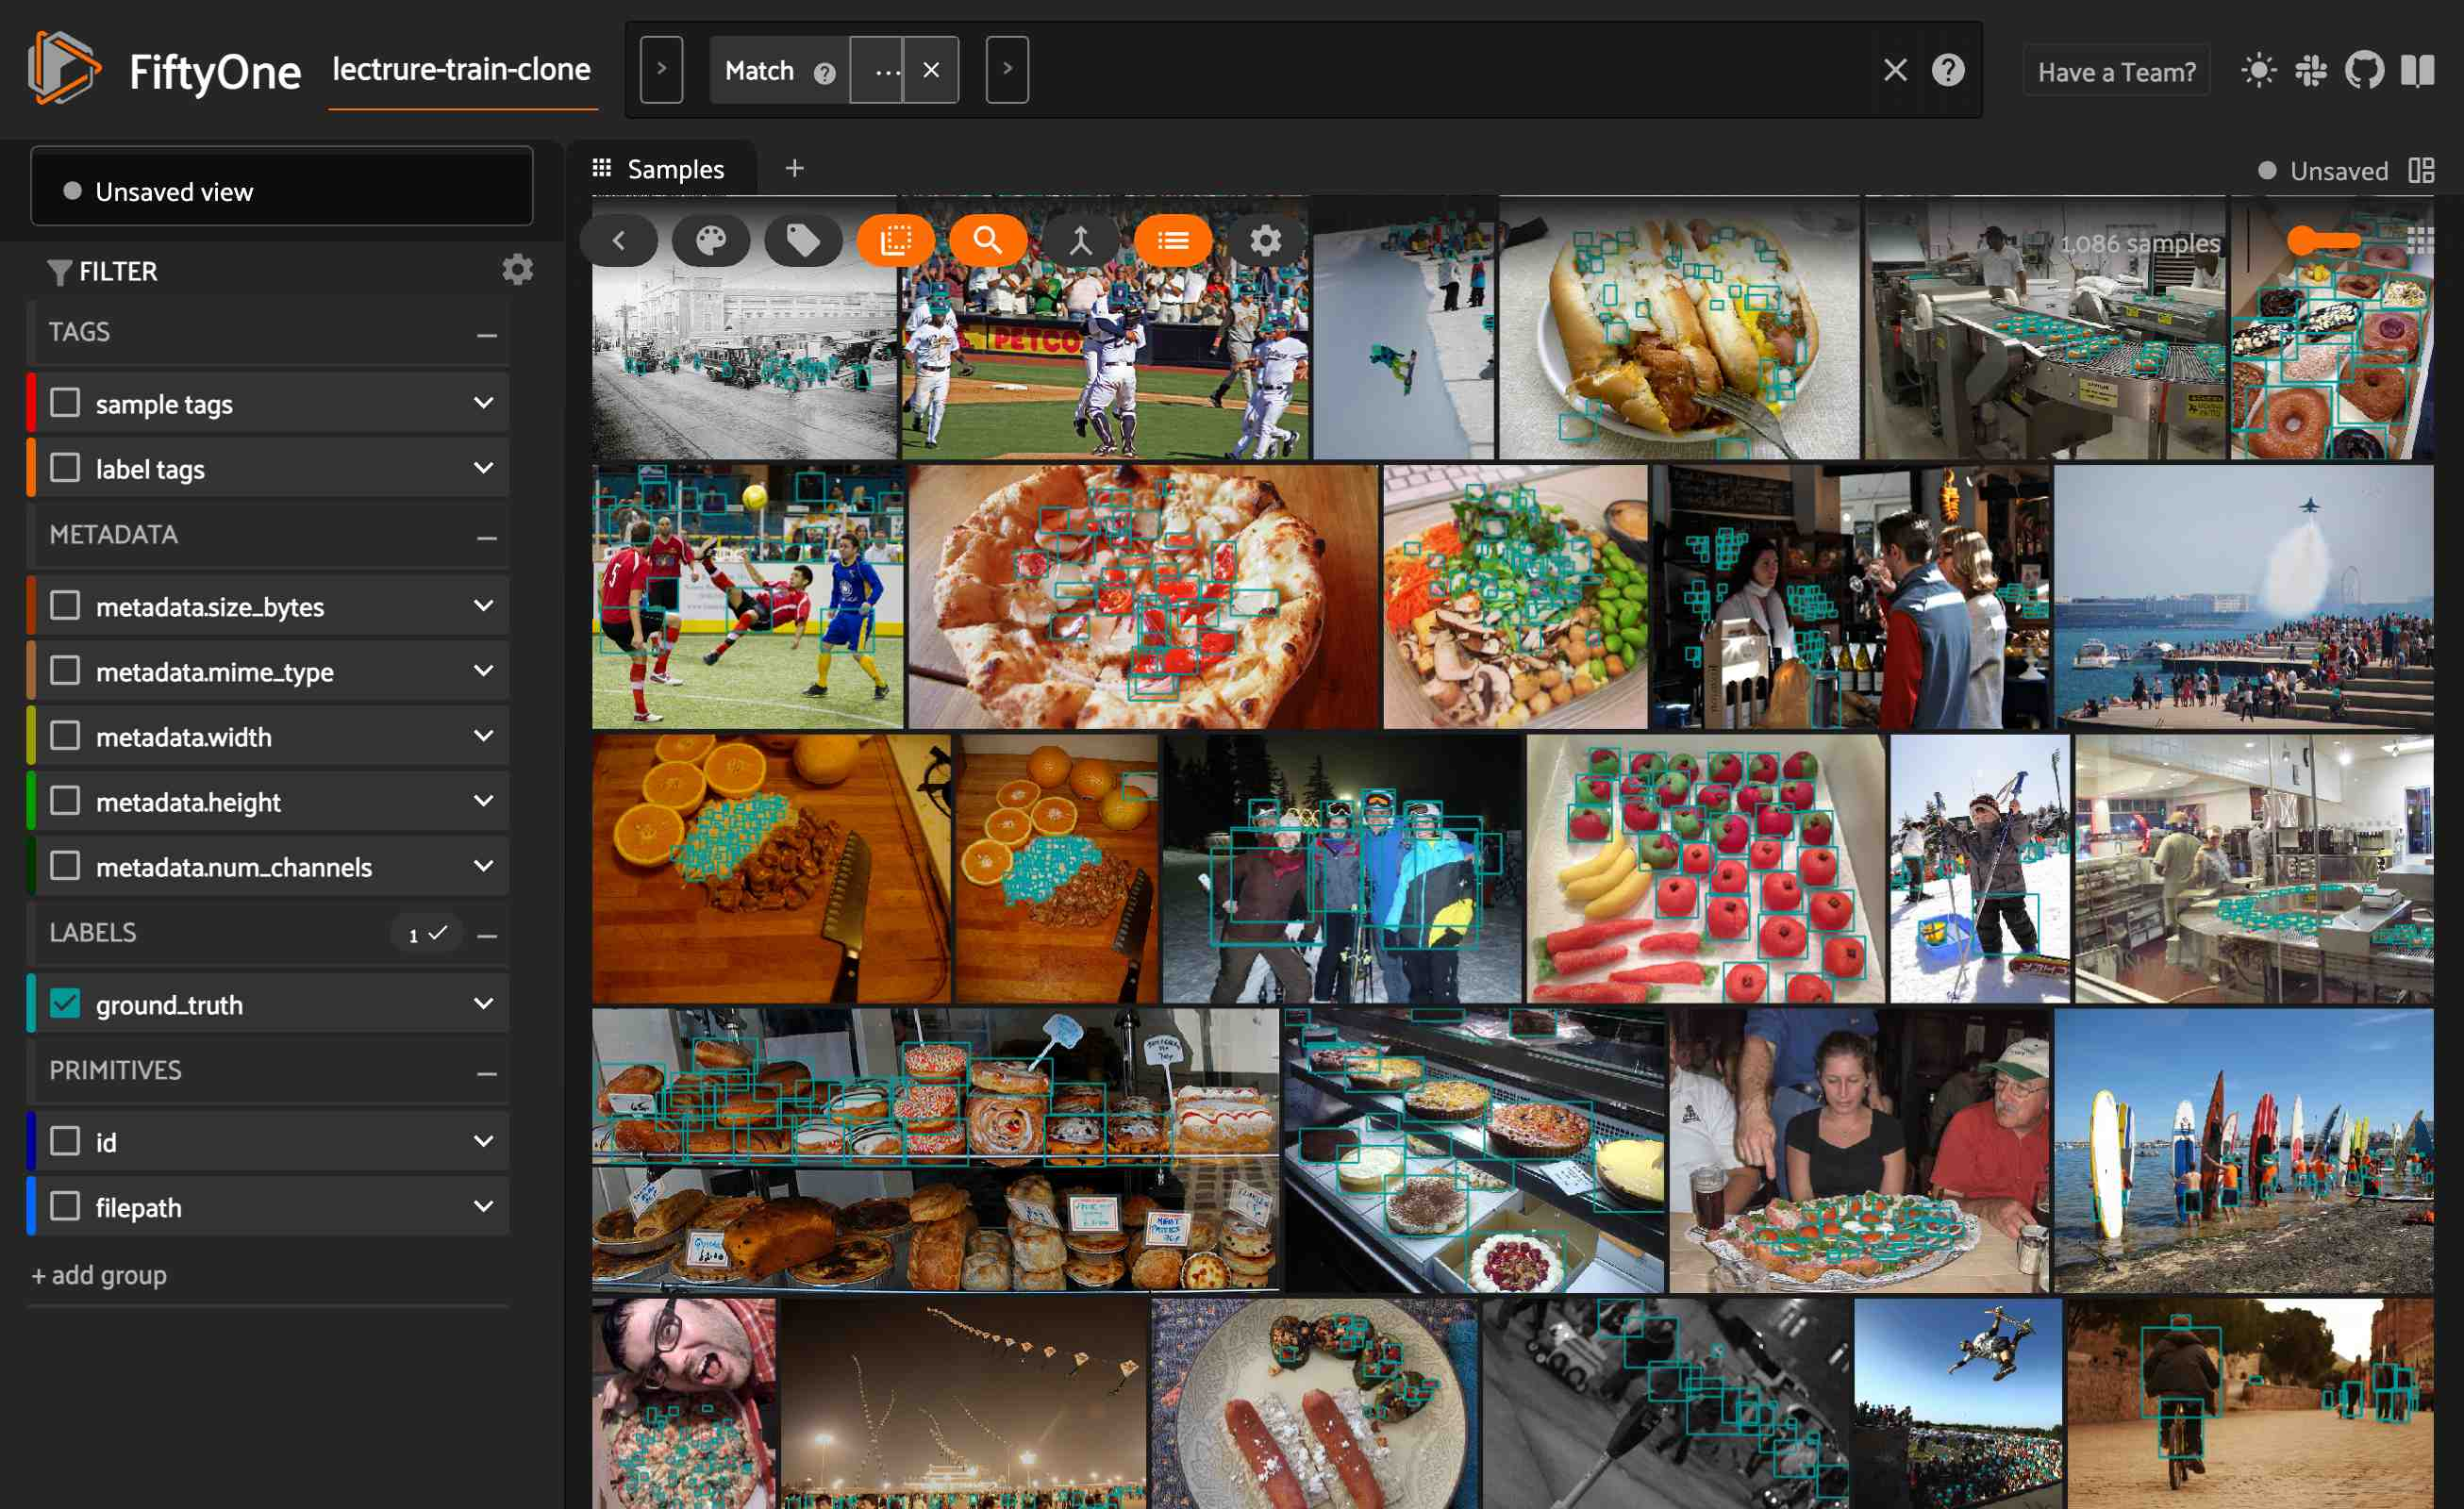

Dataset:          lectrure-train-clone
Media type:       image
Num samples:      1086
Selected samples: 0
Selected labels:  0
Session URL:      http://localhost:5151/
View stages:
    1. Match(filter={'$expr': {'$gt': [...]}})

In [102]:
lots_of_detections_stage = fo.Match(F("ground_truth.detections").length() > 15) 
lots_of_detections_view = dataset.add_stage(lots_of_detections_stage)
fo.launch_app(lots_of_detections_view)

And, perhaps, your exploration leads you wonder what contexts the tomatos class occurs in. For that, you can filter the Dataset by label.

In [162]:
select_tomato_stage = fo.SelectBy("ground_truth.detections.label", "tomato")
tomato_view = dataset.add_stage(select_tomato_stage)
tomato_view

Dataset:     lectrure-train-clone
Media type:  image
Num samples: 964
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
View stages:
    1. SelectBy(field='ground_truth...ections.label', values=['tomato'], ordered=False)

In [163]:
tomato_view.count_values("ground_truth.detections.label")

{'hat': 6,
 'flowerpot': 18,
 'onion': 1597,
 'pastry': 11,
 'doughnut': 5,
 'jean': 6,
 'bucket': 22,
 'trousers': 1,
 'sunglasses': 38,
 'jacket': 4,
 'tomato': 9692,
 'short_pants': 2,
 'trash_can': 1}

In [159]:
fo.launch_app(tomato_view_using_filer_label)

Dataset:          lectrure-train-clone
Media type:       image
Num samples:      964
Selected samples: 0
Selected labels:  0
Session URL:      http://localhost:5151/
View stages:
    1. FilterLabels(field='ground_truth.detections', filter={'$eq': ['$$this.label', 'tomato']}, only_matches=True, trajectories=False)

You can do something similar, yet with different behaviour, like so:

In [180]:
filter_tomato_stage = fo.FilterLabels(("ground_truth.detections"), F("label")=="tomato")

filter_tomato_view = dataset.add_stage(filter_tomato_stage)

filter_tomato_view

Dataset:     lectrure-train-clone
Media type:  image
Num samples: 964
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
View stages:
    1. FilterLabels(field='ground_truth.detections', filter={'$eq': ['$$this.label', 'tomato']}, only_matches=True, trajectories=False)

In [181]:
filter_tomato_view.count_values("ground_truth.detections.label")

{'tomato': 9692}

Alternatively, you can do the following:

In [164]:
tomato_view_using_filter_label = dataset.filter_labels("ground_truth.detections", F("label")=="tomato")
tomato_view_using_filter_label

Dataset:     lectrure-train-clone
Media type:  image
Num samples: 964
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
View stages:
    1. FilterLabels(field='ground_truth.detections', filter={'$eq': ['$$this.label', 'tomato']}, only_matches=True, trajectories=False)

In [165]:
tomato_view_using_filter_label.count_values("ground_truth.detections.label")

{'tomato': 9692}

Now you might be wondering how many images do you have per label, the easiest way to do that is:

In [172]:
all_label_in_dataset = dataset.distinct("ground_truth.detections.label")

counts_of_images_with_label = {}

for _label in all_label_in_dataset:
    _label_view = dataset.filter_labels("ground_truth.detections", F("label")==_label)
    counts_of_images_with_label[_label] = _label_view.count()

counts_of_images_with_label

We'll build on this foundation as we being to explore the data further.

Take sometime to review the following documentation (as you can expect questions on the quiz about them):

- [`Stages`](https://docs.voxel51.com/api/fiftyone.core.stages.html)

- [`DatasetView`](https://docs.voxel51.com/api/fiftyone.core.view.html)

- [`ViewExpression`](https://docs.voxel51.com/api/fiftyone.core.expressions.html?highlight=viewexpression#fiftyone.core.expressions.ViewExpression)

- [`ViewField`](https://docs.voxel51.com/api/fiftyone.core.expressions.html#fiftyone.core.expressions.ViewField)



